In [43]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import random
import matplotlib.pyplot as plt

In [44]:


# Specify the URL
url = 'https://www.mrao.cam.ac.uk/surveys/snrs/snrs.data.html'

# Fetch the content from the URL
response = requests.get(url, verify=False)
content = response.content

# Parse the content with BeautifulSoup
soup = BeautifulSoup(content, 'html.parser')

pre_tag = soup.find('pre')

pre_contents = pre_tag.text

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mrao.cam.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [45]:
lines = pre_contents.strip().split("\n")
lines = [element for element in lines if element]
lines_val = lines[4:-1]

In [46]:
print(lines_val[0])

   0.0  +0.0  17 45 44  -29 00  3.5x2.5  S     100?     0.8?     Sgr A East


In [47]:
dist_max = 10185.42355352
dist_min = 9132.09022019

box_len = 2000

theta_max = np.arctan((box_len/2)/dist_max)
theta_min = np.arctan((box_len/2)/dist_min)

angle_max = 2 * (theta_max*180/np.pi)
angle_min = 2 * (theta_min*180/np.pi)

print(angle_min)
print(angle_max)

12.498431001065951
11.214603133830998


In [48]:
snr_in_5x5 = 1.5

snr_in_angle = int(np.round((snr_in_5x5/25)*angle_max**2))
snr_in_angle

8

In [49]:
grid = 2000

canvas = np.zeros((grid, grid))

random_points = [(random.randint(0, grid-1), random.randint(0, grid-1)) for _ in range(snr_in_angle)]
random_points

[(650, 958),
 (1431, 363),
 (1540, 560),
 (1199, 1425),
 (1640, 216),
 (1032, 650),
 (391, 1232),
 (1227, 1467)]

In [50]:
amnt_of_samples = len(lines_val) # amount of specimen
amnt_of_samples

303

In [51]:
sample_idx = [random.randint(0, 302) for _ in range(snr_in_angle)]
sample_idx

[142, 162, 83, 21, 238, 85, 103, 60]

In [52]:
a_values_list = []
b_values_list = []
flux_values_list = []
spectral_idx = []

for i in sample_idx:

    test_line = lines_val[i]
    print(test_line)
    '''if '?' in test_line:
        test_line = test_line.replace('?','')'''
    


    columns = re.split(r' {2,}| (?=[+ - S F C])', test_line)
    if columns[0]=='':
            columns.remove(columns[0])
    if columns[5]=='?':
            columns[5] = 'S'

    columns = [s.replace('?', '') for s in columns]
    print(columns)

    ang_size = columns[4] 
    flux = columns[6]
    spctrl_idx = columns[7]
    
    if spctrl_idx.strip() == '' or spctrl_idx.strip() == 'varies':
            spctrl_idx = 0.5 # random value, can be substituted by mean/mode value from the column

    if '>' in flux:
        flux = flux.replace('>','')
    if flux.strip() == '':
            flux = 7 # random value, can be substituted by mean/mode value from the column
    
    

    if 'x' in ang_size:
        a = float(ang_size.split('x')[0])
        b = float(ang_size.split('x')[1])
    else:
        r = float(ang_size)
        a = r
        b = r

    a_values_list.append(a/2)
    b_values_list.append(b/2)
    flux_values_list.append(float(flux))
    spectral_idx.append(float(spctrl_idx))

  94.0  +1.0  21 24 50  +51 53   30x25   S      13      0.45     3C434.1
['94.0', '+1.0', '21 24 50', '+51 53', '30x25', 'S', '13', '0.45', '3C434.1']
 159.6  +7.3  05 20 00  +50 00  240x180? S       ?      ?
[' 159.6', '+7.3', '05 20 00', '+50 00', '240x180', 'S', '', '']
  31.5  -0.6  18 51 10  -01 31    18?    S?      2?     ?
['31.5', '-0.6', '18 51 10', '-01 31', '18', 'S', '2', '']
   7.0  -0.1  18 01 50  -22 54    15     S       2.5?   0.5?
['7.0', '-0.1', '18 01 50', '-22 54', '15', 'S', '2.5', '0.5']
 329.7  +0.4  16 01 20  -52 18   40x33   S     >34?     ?
[' 329.7', '+0.4', '16 01 20', '-52 18', '40x33', 'S', '>34', '']
  32.0  -4.9  19 06 00  -03 00    60?    S?     22?     0.5?     3C396.1
['32.0', '-4.9', '19 06 00', '-03 00', '60', 'S', '22', '0.5', '3C396.1']
  43.3  -0.2  19 11 08  +09 06    4x3    S      38      0.46     W49B
['43.3', '-0.2', '19 11 08', '+09 06', '4x3', 'S', '38', '0.46', 'W49B']
  18.9  -1.1  18 29 50  -12 58    33     C?     37      0.39
['18.9', '

In [53]:
print(a_values_list)
print(b_values_list)
print(flux_values_list)
print(spectral_idx)

[15.0, 120.0, 9.0, 7.5, 20.0, 30.0, 2.0, 16.5]
[12.5, 90.0, 9.0, 7.5, 16.5, 30.0, 1.5, 16.5]
[13.0, 7.0, 2.0, 2.5, 34.0, 22.0, 38.0, 37.0]
[0.45, 0.5, 0.5, 0.5, 0.5, 0.5, 0.46, 0.39]


In [54]:
nu_ref = float(1000) # 1 GHz to MHz
freq = 157.78 # MHz

spctrl_idx_array = np.array(spectral_idx, dtype=float)
flux_values_list_array = np.array(flux_values_list, dtype=float)

F_at_freq = flux_values_list_array*((freq/nu_ref)**spctrl_idx_array)

print(spctrl_idx_array)
print(flux_values_list_array)
print(F_at_freq)

[0.45 0.5  0.5  0.5  0.5  0.5  0.46 0.39]
[13.   7.   2.   2.5 34.  22.  38.  37. ]
[ 5.663263    2.78050715  0.79443061  0.99303827 13.50532043  8.73873675
 16.25127706 18.00702573]


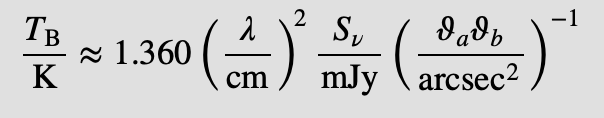

https://www.atnf.csiro.au/people/Tobias.Westmeier/tools_hihelpers.php

In [55]:
def flux_to_brghtnss_temp(freq, flux):

    freq_hz = freq * 10**6 # Hz
    c0 = 299792458 # m/s
    flux_mJy = flux * 10**3 # mJy
    Theta = 3 * 60 # arcsec, FoV of the instrument not from the BOX_LEN!!!
                   # Take as 3 arcmin

    lmbda = (c0/freq_hz) * 10**2 # cm
    S_nu = flux_mJy

    #print(lmbda)

    T = 1.360 * lmbda**2 * S_nu * (Theta**2)**(-1) # in K


    return T

In [56]:
T = flux_to_brghtnss_temp(freq, F_at_freq)
print(T)

[ 8582.19011977  4213.62048228  1203.89156637  1504.86445796
 20466.15662824 13242.80723004 24627.41875266 27288.10552253]


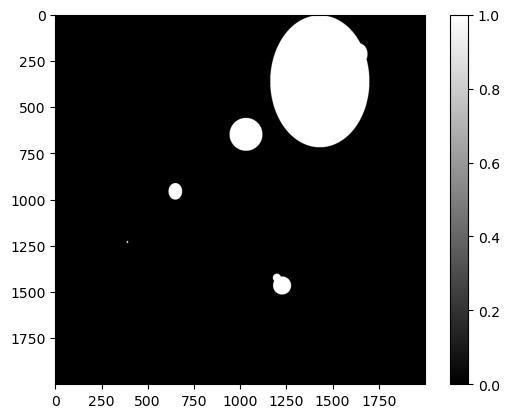

In [57]:
def draw_multiple_ellipses_on_grid(coordinates, a_values, b_values, angle_max, grid_size):

    canvas_angular_size_arcminutes = angle_max * 60

    # Scale factor: number of pixels per arcminute
    scale_factor = grid_size / canvas_angular_size_arcminutes

    grid = np.zeros((grid_size, grid_size))

    for (center_x, center_y), a, b in zip(coordinates, a_values, b_values):
        # Convert ellipse dimensions to grid units
        semi_major_axis_pixels = int(round(a * scale_factor))
        semi_minor_axis_pixels = int(round(b * scale_factor))

        # Calculate the range for the ellipse in both x and y directions
        x_range = np.arange(center_x - semi_minor_axis_pixels, center_x + semi_minor_axis_pixels + 1)
        y_range = np.arange(center_y - semi_major_axis_pixels, center_y + semi_major_axis_pixels + 1)

        # Ensure the ranges are within the grid boundaries
        x_range = x_range[(x_range >= 0) & (x_range < grid_size)]
        y_range = y_range[(y_range >= 0) & (y_range < grid_size)]

        # Fill pixels within the ellipse
        for x_pixel in x_range:
            for y_pixel in y_range:
                if ((x_pixel - center_x)**2 / semi_minor_axis_pixels**2 + 
                    (y_pixel - center_y)**2 / semi_major_axis_pixels**2) <= 1:
                    grid[y_pixel, x_pixel] = 1

    return grid

# Example usage with a list of coordinates and corresponding dimensions
coordinates_list = random_points


# Draw the ellipses
multiple_ellipse_grid = draw_multiple_ellipses_on_grid(random_points, a_values_list, b_values_list, angle_max, grid)


# Plotting
plt.imshow(multiple_ellipse_grid, cmap='gray')
plt.colorbar()
plt.show()